In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('prostate.data.txt', delimiter='\t')

In [3]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

### Clasic regression

The first step is to perform a classical linear regression in order to recover a baseline error, which one wishes to improve using regularization techniques.

In [4]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

2.8641499657014444


### Ridge regression

As seen in the chapter on ridge regression, we have to find a suitable regularization coefficient. As a reminder, the objective is to bias the prediction a little, in order to reduce the standard error. 

We call this coefficient alpha, we will test a number of them to find the optimal one.

In [5]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

We can now test all the ridged regressions with the different values ​​of the hyperparameter α. We recover the weights of the various coefficients of the associated regression as well as the quadratic error.

In [6]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

We can display the evolution of the value of the different weights associated with the parameters.

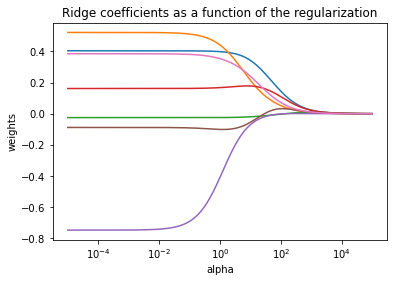

In [7]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

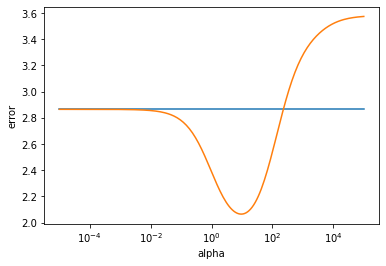

In [8]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [9]:
min(errors)

[2.8641499657014444, 2.064827060795023]

### Lasso application

In [10]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

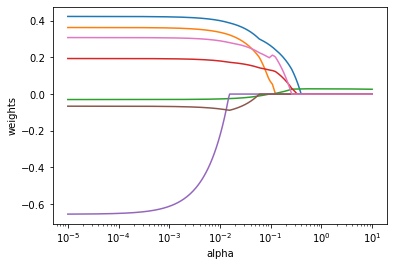

In [11]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()